In [1]:
!dir

 Volume in drive D is Samip
 Volume Serial Number is 3A4B-753D

 Directory of d:\TessTutorial

09/03/2024  05:58 PM    <DIR>          .
08/29/2024  07:15 PM    <DIR>          datagentest
08/30/2024  09:24 PM             1,024 groundtruth.py
05/13/2024  03:07 PM           189,856 notice.jpg
08/29/2024  10:56 AM           642,324 NotoSansDevanagari-VariableFont_wdth,wght.ttf
09/03/2024  06:57 PM            46,863 ocrtest.ipynb
09/03/2024  04:05 PM            43,272 output.png
09/02/2024  07:32 PM    <DIR>          tesseract_tutorial
08/29/2024  07:08 PM    <DIR>          test_images
09/03/2024  06:58 PM           111,027 train.ipynb
               6 File(s)      1,034,366 bytes
               4 Dir(s)   4,459,945,984 bytes free


In [2]:
#switch to  tesstrain
%cd tesseract_tutorial/tesstrain
!dir

d:\TessTutorial\tesseract_tutorial\tesstrain
 Volume in drive D is Samip
 Volume Serial Number is 3A4B-753D

 Directory of d:\TessTutorial\tesseract_tutorial\tesstrain

09/03/2024  02:12 PM    <DIR>          .
09/02/2024  07:32 PM    <DIR>          ..
08/29/2024  11:20 AM    <DIR>          .github
08/29/2024  11:20 AM                28 .gitignore
08/29/2024  11:20 AM               264 .pylintrc
08/29/2024  11:20 AM             1,634 count_chars.py
09/03/2024  01:29 PM    <DIR>          data
08/29/2024  11:20 AM             1,068 generate_eval_train.py
08/29/2024  11:20 AM             1,095 generate_gt_from_box.py
08/29/2024  11:20 AM             1,527 generate_line_box.py
08/29/2024  11:20 AM             2,336 generate_line_syllable_box.py
08/29/2024  11:20 AM             1,316 generate_wordstr_box.py
08/29/2024  11:20 AM            10,349 LICENSE
09/03/2024  02:51 PM            17,852 Makefile
09/03/2024  01:55 PM                90 nep-new_2.450_1198_4900.log
08/29/2024  11:20 AM     

## FINE TUNING THE MODEL

Training is done through bash command

In [11]:
#Renaming file to avoid conflict in bash
import os

def replace_brackets_in_filenames(folder_path):
    for filename in os.listdir(folder_path):
        new_filename = filename.replace('(', '_').replace(')', '_')
        # If filename has changed, rename the file
        if new_filename != filename:
            old_file_path = os.path.join(folder_path, filename)
            new_file_path = os.path.join(folder_path, new_filename)
            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} -> {new_file_path}')

# Specify the folder path
folder_path = "data/nep-fuse-2-ground-truth"
replace_brackets_in_filenames(folder_path)


Renamed: data/nep-fuse-2-ground-truth\1(aug_1).box -> data/nep-fuse-2-ground-truth\1_aug_1_.box
Renamed: data/nep-fuse-2-ground-truth\1(aug_1).gt.txt -> data/nep-fuse-2-ground-truth\1_aug_1_.gt.txt
Renamed: data/nep-fuse-2-ground-truth\1(aug_1).png -> data/nep-fuse-2-ground-truth\1_aug_1_.png
Renamed: data/nep-fuse-2-ground-truth\1(aug_2).gt.txt -> data/nep-fuse-2-ground-truth\1_aug_2_.gt.txt
Renamed: data/nep-fuse-2-ground-truth\1(aug_2).png -> data/nep-fuse-2-ground-truth\1_aug_2_.png
Renamed: data/nep-fuse-2-ground-truth\10(aug_1).gt.txt -> data/nep-fuse-2-ground-truth\10_aug_1_.gt.txt
Renamed: data/nep-fuse-2-ground-truth\10(aug_1).png -> data/nep-fuse-2-ground-truth\10_aug_1_.png
Renamed: data/nep-fuse-2-ground-truth\10(aug_2).gt.txt -> data/nep-fuse-2-ground-truth\10_aug_2_.gt.txt
Renamed: data/nep-fuse-2-ground-truth\10(aug_2).png -> data/nep-fuse-2-ground-truth\10_aug_2_.png
Renamed: data/nep-fuse-2-ground-truth\100(aug_1).gt.txt -> data/nep-fuse-2-ground-truth\100_aug_1_.gt.tx

In [14]:
import os
import subprocess

# Step 1: Set environment variables
os.environ['TESSDATA_PREFIX'] = r'..\tesseract\tessdata'
os.environ['GROUND_TRUTH_DIR'] = r'..\data\nep-new-ground-truth'

# Step 2: Prepend the desired directory to the PATH environment variable
git_bin_path = r'C:\Program Files\Git\usr\bin'
os.environ['PATH'] = git_bin_path + os.pathsep + os.environ['PATH']

# Step 3: Change the working directory to where the ground truth files are located
os.chdir(r'..\data\nep-fuse-2-ground-truth')

# Debug: Print the current working directory and list of files
print("Current working directory:", os.getcwd())
print("Files in the current directory:", os.listdir())

# Step 4: Verify the presence of ground truth files
ground_truth_files = [f for f in os.listdir() if f.endswith('.gt.txt')]
if not ground_truth_files:
    raise FileNotFoundError("No ground truth files (*.gt.txt) found in the directory.")

# Step 5: Change the working directory to the tesstrain folder
os.chdir(r'..\..\tesstrain')

# Step 6: Define the command
command = [
    'make', 'training',
    'MODEL_NAME=nep-fuse-2',
    'START_MODEL=nep',
    'TESSDATA=../tesseract/tessdata',
    'LEARNING_RATE=0.002',
    'LANG_TYPE=Indic',
    # 'FINE_TUNE_TYPE=Impact',
    'MAX_ITERATIONS=2000'
    # 'make plot MODEL_NAME=nep-fuse'
]

# Step 7: Run the command and print output in real-time
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# Step 8: Print the output line by line
for line in process.stdout:
    print(line, end='')

# Step 9: Wait for the process to complete and get the return code
process.wait()
print(f"Process finished with return code {process.returncode}")

Current working directory: d:\TessTutorial\tesseract_tutorial\data\nep-fuse-2-ground-truth
Files in the current directory: ['1(aug_1).gt.txt', '1(aug_1).png', '1(aug_2).gt.txt', '1(aug_2).png', '1.gt.txt', '1.png', '10(aug_1).gt.txt', '10(aug_1).png', '10(aug_2).gt.txt', '10(aug_2).png', '10.gt.txt', '10.png', '100(aug_1).gt.txt', '100(aug_1).png', '100(aug_2).gt.txt', '100(aug_2).png', '100.gt.txt', '100.png', '101(aug_1).gt.txt', '101(aug_1).png', '101(aug_2).gt.txt', '101(aug_2).png', '101.gt.txt', '101.png', '102(aug_1).gt.txt', '102(aug_1).png', '102(aug_2).gt.txt', '102(aug_2).png', '102.gt.txt', '102.png', '103(aug_1).gt.txt', '103(aug_1).png', '103(aug_2).gt.txt', '103(aug_2).png', '103.gt.txt', '103.png', '104(aug_1).gt.txt', '104(aug_1).png', '104(aug_2).gt.txt', '104(aug_2).png', '104.gt.txt', '104.png', '105(aug_1).gt.txt', '105(aug_1).png', '105(aug_2).gt.txt', '105(aug_2).png', '105.gt.txt', '105.png', '106(aug_1).gt.txt', '106(aug_1).png', '106(aug_2).gt.txt', '106(aug_2

In [27]:
import subprocess

# Define the command to be executed with the LOG_FILE parameter
log_file_path = 'data/nep-new/training.log'  # Specify the path to the log file
command = ['make', 'evaluation', 'MODEL_NAME=nep-fuse-2']

# Run the command and print output in real-time
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# Print the output line by line
for line in process.stdout:
    print(line, end='')

# Wait for the process to complete and get the return code
process.wait()
print(f"Process finished with return code {process.returncode}")

You are using make version: 4.4.1
make: Nothing to be done for 'evaluation'.
Process finished with return code 0


### Training and Testing Error Plot

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

In [29]:
def read_training_error(log_file):
    iterations = []
    errors = []
    with open(log_file, 'r') as file:
        for line in file:
            match = re.search(r'At iteration \d+/\d+/(\d+), .* BCER train=([\d.]+)%', line)
            if match:
                iterations.append(int(match.group(1)))
                errors.append(float(match.group(2)))
    return pd.DataFrame({'Iteration': iterations, 'Training Error': errors})

In [30]:
def read_testing_error(log_folder):
    iterations = []
    errors = []
    for log_file in os.listdir(log_folder):
        if log_file.endswith('.eval.log'):
            iteration = int(re.search(r'_(\d+)\.eval\.log', log_file).group(1))
            with open(os.path.join(log_folder, log_file), 'r') as file:
                for line in file:
                    match = re.search(r'BCER eval=([\d.]+)', line)
                    if match:
                        iterations.append(iteration)
                        errors.append(float(match.group(1)))
                        break
    return pd.DataFrame({'Iteration': iterations, 'Testing Error': errors})

In [31]:
training_error = read_training_error('data/nep-fuse-2/training.log')
training_error

,Iteration,Training Error
0,100,18.776
1,200,17.142
2,300,16.531
3,400,15.969
4,500,15.934
5,600,15.815
6,700,15.479
7,800,15.583
8,900,15.306
9,1000,14.969


In [32]:
testing_error= read_testing_error('data/nep-fuse-2/eval')
testing_error.sort_values(by='Iteration', inplace=True)
testing_error.reset_index(drop=True, inplace=True)
testing_error

,Iteration,Testing Error
0,100,15.769
1,200,14.784
2,300,13.768
3,400,13.288
4,900,12.601
5,1100,11.948
6,1300,11.498
7,1600,10.755
8,1700,11.080
9,1800,10.865


In [33]:
data = pd.merge(training_error, testing_error, on='Iteration', how='inner').sort_values(by='Iteration')
data

,Iteration,Training Error,Testing Error
0,100,18.776,15.769
1,200,17.142,14.784
2,300,16.531,13.768
3,400,15.969,13.288
4,900,15.306,12.601
5,1100,14.360,11.948
6,1300,13.603,11.498
7,1600,12.940,10.755
8,1700,12.426,11.080
9,1800,11.786,10.865


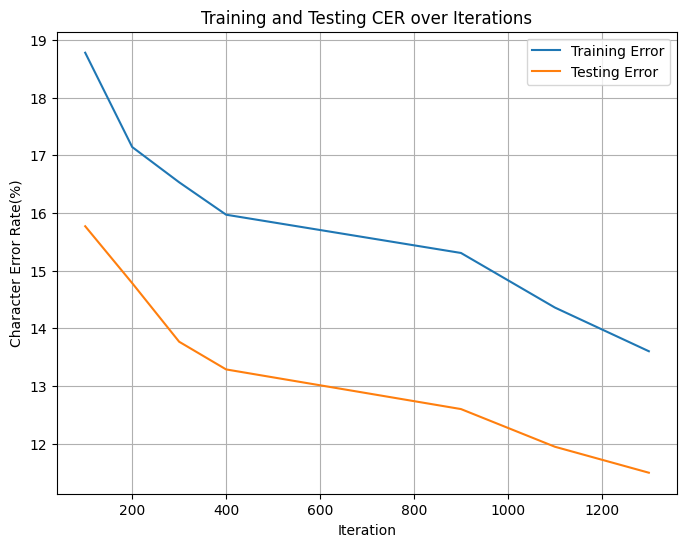

In [34]:
# Filter data to include only the first 1500 iterations
filtered_data = data[data['Iteration'] <= 1500]

plt.figure(figsize=(8, 6))
plt.plot(filtered_data['Iteration'], filtered_data['Training Error'], label='Training Error')
plt.plot(filtered_data['Iteration'], filtered_data['Testing Error'], label='Testing Error')
plt.xlabel('Iteration')
plt.ylabel('Character Error Rate(%)')
plt.title('Training and Testing CER over Iterations')
plt.legend()
plt.grid(True)
plt.show()